In [2]:
import pandas as pd

In [3]:
#Load the data set
claimants = pd.read_csv("D:\\ALL DATA SCIENCE\\Learn Digital\\DataSets\\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


Dependent Variable 
ATTORNEY:  Attorney=0, if yes   Attorney=1, if not                                     

Predict the outcome whether claimant is represented by an attorney or not on the following-
- Claimant’s age –CLMAGE (D1)(in years)
- Claimant’s gender- CLMSEX(D2)(0 if Male, 1 if Female)
- Whether the claimant was wearing seatbelt –SEATBELT (D4) (0 if yes, 1 if no)
- Whether the driver of the claimant’s vehicle was uninsured-CLMINSUR (D5) (0 if yes, 1 if no)
- The claimant’s total economic loss (in thousands) -LOSS     (X)


In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
# Drop the "Case number" column as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [6]:
#Without using the 'inplace=True', we will have to create a copy of the dataset while dropping the mentioned column 
claimants1=claimants.drop(["CASENUM"],axis = 1)
claimants1

KeyError: "['CASENUM'] not found in axis"

In [7]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [8]:
#Shape of the data set
claimants.shape

(1340, 6)

In [9]:
#To check number of missing values?
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
# Percentage of data missing in the Age variable
(189/1340)*100

14.1044776119403

In [11]:
# Percentage of data missing in the Gender variable
(12/1340)*100

0.8955223880597015

In [12]:
# Percentage of data missing in the SeatBelt variable
(48/1340)*100

3.582089552238806

In [13]:
# Percentage of data missing in the Driver Insurance variable
(41/1340)*100

3.0597014925373136

In [14]:
claimants[claimants.isnull().any(axis=1)]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
9,1,0.0,1.0,0.0,NaN,0.350
20,0,0.0,NaN,0.0,37.0,3.100
23,0,0.0,NaN,0.0,30.0,0.609
29,0,0.0,1.0,0.0,NaN,0.595
31,1,0.0,1.0,0.0,NaN,0.337
...,...,...,...,...,...,...
1316,1,1.0,0.0,NaN,10.0,0.158
1318,1,1.0,1.0,0.0,NaN,0.070
1320,1,1.0,1.0,0.0,NaN,0.540
1321,0,0.0,1.0,0.0,NaN,3.437


In [15]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [16]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [17]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [18]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [19]:
#help(classifier)

In [20]:
#0= Male   1=Female
#0= Yes    1=Not hiring attorney
#0=Wearing SeatBelt   1=Not Wearing SeatBelt

In [21]:
classifier.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

Interpretation

- A Female has 0.42 greater chances of not appointing Attorney as compared to males
- A claimant whose driver was insured has 0.57 greater chances of not appointing Attorney.
- Claimant's driver not wearing a seatbelt has 0.59 lesser chances not appointing Attorney.
- With a unit increase in the age of the claimant, there is 0.006 times more chances that Attorney would not be hired.
- With a unit increase in the loss, there is 0.38 times lesser chances not appointing the Attorney.

For binary independent variables:
As compared to binary outcome '0' in the independent variable, the binary outcome '1' for the independent variable has beta coefficient times more/less (depending +/- sign) impact on the binary outcome '1' in the dependent variable. 

For continuous independent variables:
Generally, With every unit increase in the independent variable outcome, there will be beta coefficient times more/less (depending +/- sign) impact on the binary outcome '1' in the dependent variable. 

In [22]:
classifier.intercept_

array([-0.17361679])

In [23]:
classifier.classes_

array([0, 1], dtype=int64)

In [24]:
classifier.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [25]:
classifier.score(X,Y)

0.708029197080292

In [26]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [27]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [28]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [29]:
y_pred_df[0:30]

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,1
6,0,0
7,0,0
8,1,1
10,0,0


In [30]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print(cm)

#Left diagonal talks about correct predictions by model
#Right diagonal talks about incorrectly classified observations or errors.
#The lesser the values in the right diagonal, the better is your model.

[[381 197]
 [123 395]]


In [31]:
#Checking for Accuracy in terms of percentage
((381+395)/(381+197+123+395))*100

70.8029197080292

In [32]:
#Checking for Sensitivity
((381)/(381+197))*100

65.91695501730104

In [33]:
#Checking for Specificity
((395)/(395+123))*100

76.25482625482626

In [ ]:
#Checking for Precision
((381)/(381+123))*100

In [ ]:
(2*75.59523809523809*65.91695501730104)/(75.59523809523809+65.91695501730104)

In [34]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

0.7108589063606365


Text(0, 0.5, 'True Positive Rate')

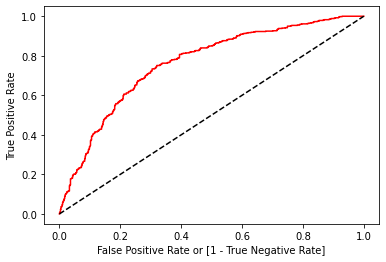

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [36]:
auc

0.7108589063606365

In [ ]:
# importing libraries
import statsmodels.api as sm
import pandas as pd
 
# loading the training dataset
df = pd.read_csv("D:\\ALL DATA SCIENCE\\Learn Digital\\DataSets\\Dataset\\claimants.csv")
 
# defining the dependent and independent variables
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]
  
# building the model and fitting the data
log_reg = sm.Logit(Y, X).fit()

In [ ]:
log_reg.summary()